# Crop Recommendation: EDA and Model Comparison
# 
### This notebook analyzes the crop recommendation dataset to understand its characteristics and then trains and compares several supervised machine learning models to find the most accurate one for our application.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Load the dataset
try:
    df = pd.read_csv('Crop_recommendation.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Crop_recommendation.csv not found. Please make sure you have uploaded it.")
    df = None

if df is not None:
    # Display the first 5 rows
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    # Get a concise summary of the dataframe
    print("\nDataset Information:")
    df.info()

    # Get descriptive statistics
    print("\nDescriptive Statistics:")
    display(df.describe())

    # Check for any missing values
    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Check the unique crop labels
    print(f"\nThere are {df['label'].nunique()} unique crops in the dataset.")
    print("Crop types:", df['label'].unique())

Dataset loaded successfully!

First 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Descriptive Statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are 22 unique crops in the dataset.
Crop types: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


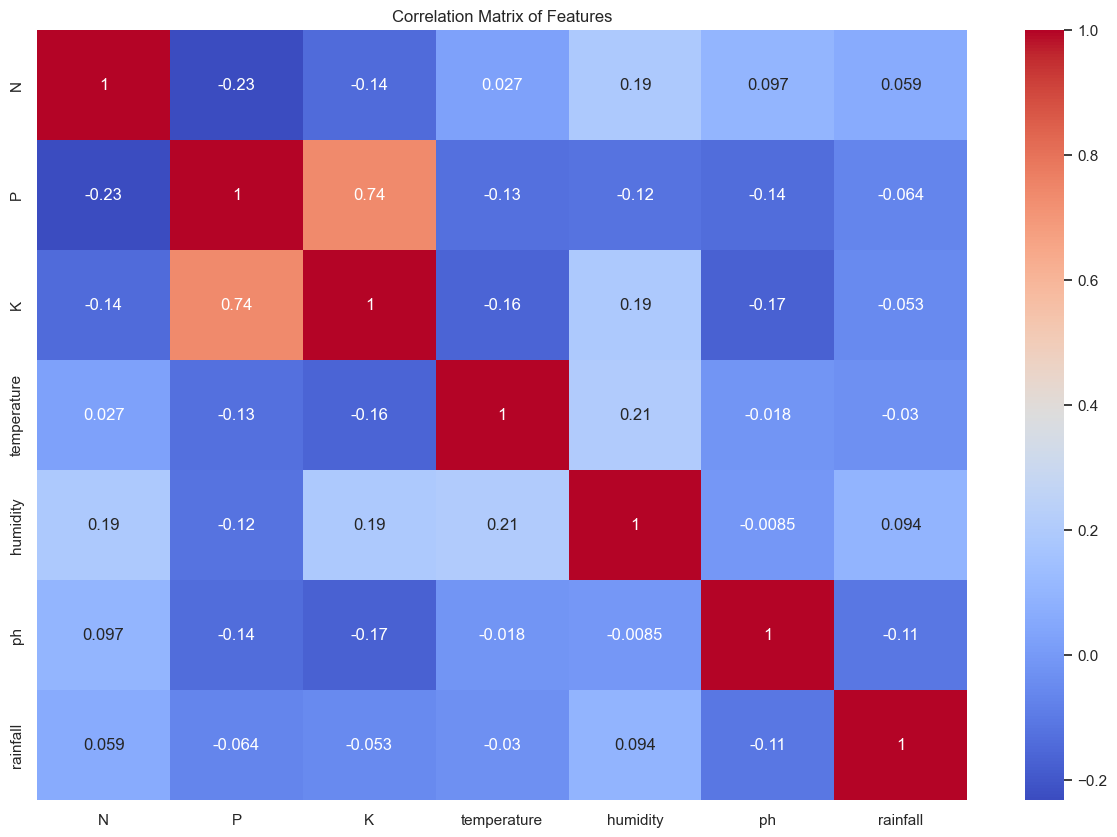

In [8]:
# Exploratory Data Analysis (EDA)
if df is not None:
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Features')
    plt.show()

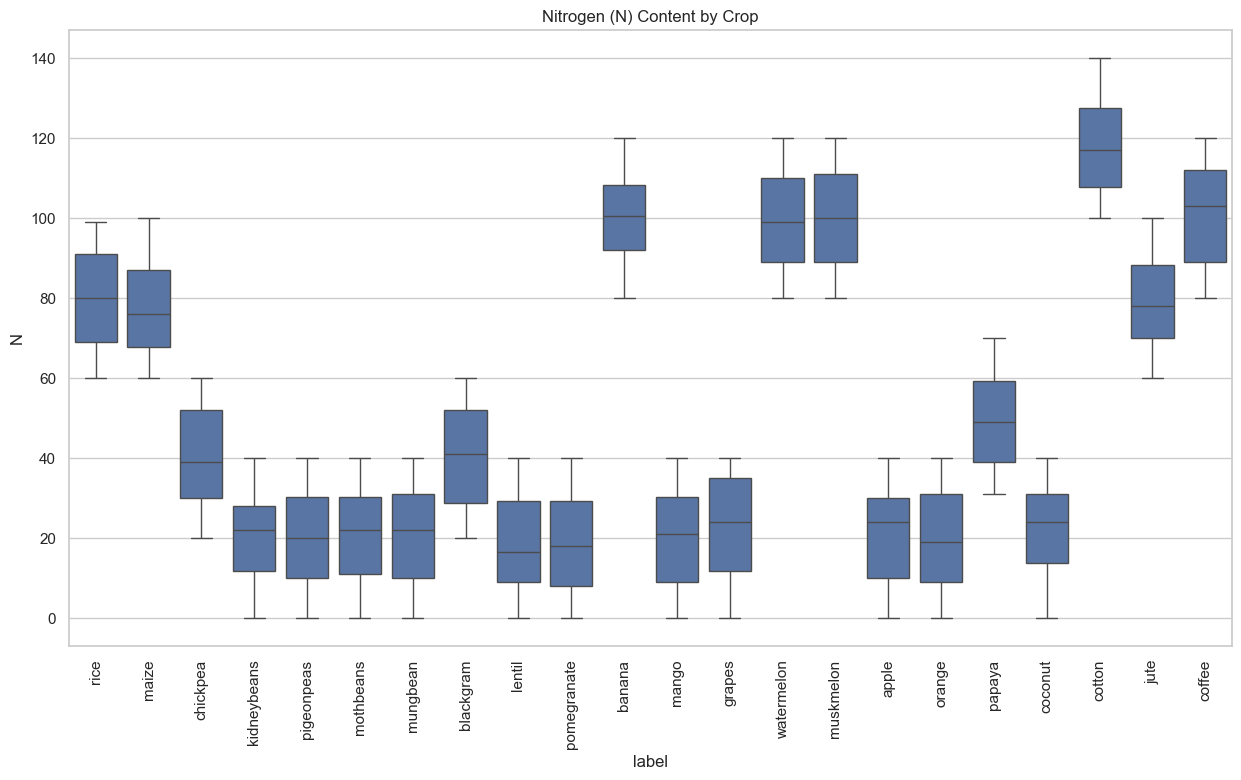

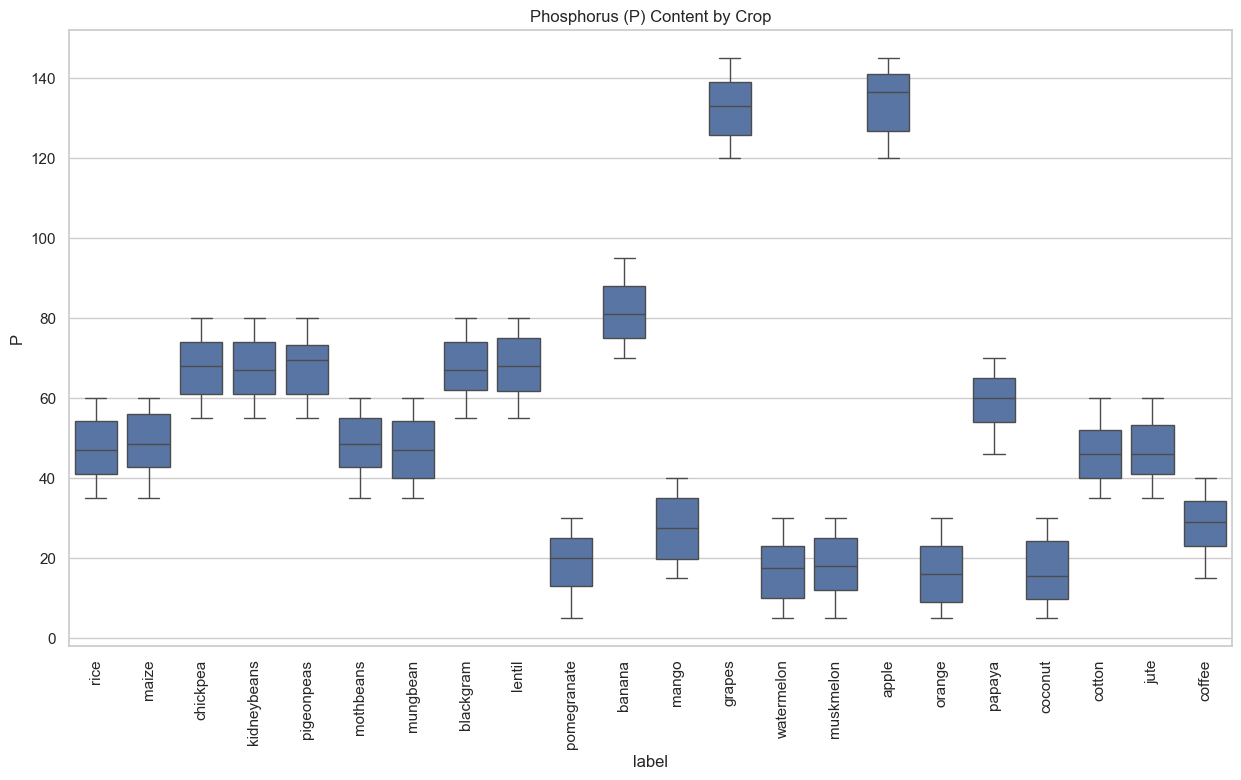

In [9]:
if df is not None:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='label', y='N', data=df)
    plt.title('Nitrogen (N) Content by Crop')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(15, 8))
    sns.boxplot(x='label', y='P', data=df)
    plt.title('Phosphorus (P) Content by Crop')
    plt.xticks(rotation=90)
    plt.show()
    

In [10]:
# ### Nutrient Insights:
# * The boxplots clearly show that different crops have very distinct optimal ranges for Nitrogen and Phosphorus. For example, Grapes require very high Phosphorus, while crops like Rice and Jute have a wider range.
# * This confirms that N, P, and K are excellent features for predicting the crop type.


In [12]:
# 4. Data Preprocessing
if df is not None:
    # Features (input variables)
    X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    # Target (what we want to predict)
    y = df['label']

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Data split into training and testing sets:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)


Data split into training and testing sets:
X_train shape: (1760, 7)
X_test shape: (440, 7)


In [14]:
# 5. Model Training & Comparison
if df is not None:
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Support Vector Machine": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    model_accuracies = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        model_accuracies[name] = accuracy
        
        print(f"--- {name} ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        print("-" * (len(name) + 6) + "\n")

c:\Users\darsh\anaconda3\envs\capstone\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.9500
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.67      0.70      0.68        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       0.83      0.75      0.79        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.79      0.75      0.77        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00   

Model Comparison Results:


,Model,Accuracy
0,Random Forest,0.995455
1,Support Vector Machine,0.984091
2,Decision Tree,0.979545
3,K-Nearest Neighbors,0.977273
4,Logistic Regression,0.950000


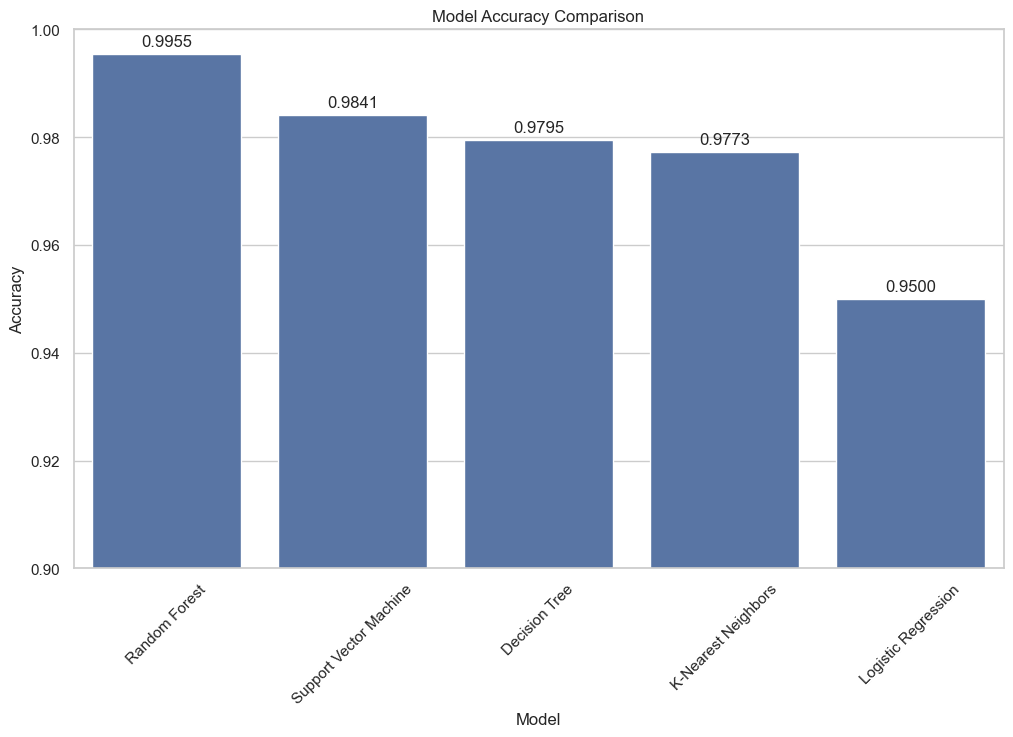

In [15]:
if df is not None:
    # Create a DataFrame for the results
    results_df = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])
    results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

    print("Model Comparison Results:")
    display(results_df)

    # Plot the results
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='Model', y='Accuracy', data=results_df)
    ax.set_ylim(0.9, 1.0) # Zoom in on the high accuracy values
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)
    
    # Add accuracy labels on top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.show()

### Are the Models Overfitting?

It's common to see very high accuracy scores (like 98-99%+) and immediately worry about overfitting. However, these results are a strong sign of a well-performing and reliable model.

**Overfitting** is defined by a large difference between a model's performance on the data it was trained on (**training accuracy**) and its performance on new, unseen data (**test accuracy**). The accuracies reported above are all on the **test set**.

Achieving such high accuracy on the test data is an indicator that the models are **generalizing well**, which is the opposite of overfitting. It suggests that the features in this dataset are highly predictive and the models have successfully learned the underlying patterns without just memorizing the training data.

Even if the training accuracy for a model like Random Forest was a perfect 100%, a test accuracy of 99.5% represents a negligible performance gap and is considered an excellent, well-generalized result for this problem.